Importing relevant libraries

In [1]:
import os 
import tensorflow as tf 
from os.path import join as pjoin 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.image import imread 
from tensorflow.keras.applications.resnet50 import preprocess_input
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.externals import joblib

Setting Random Numbers across functions for reproducability.

In [6]:
seed_value=98765

In [7]:
random.seed(seed_value)

In [8]:

np.random.seed(seed_value)


In [9]:
tf.random.set_seed(seed_value)

The data for this exercise is taken from [Kaggle](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection). For training and testing purpose the folder structure has been changed to 

*   train  
         *yes
         *no
*   test
         *yes
         *no



In [10]:
dataset_path='/content/drive/MyDrive/Hive_NeuroScience/brain_tumour_images/'

In [11]:
test_path = pjoin(dataset_path, 'test')
train_path = pjoin(dataset_path, 'train')

**Exploratory Data Analysis**

In [12]:
#Find the list of images in train and test  folder under each subcategory
def get_image_list(my_data_dir,isTumour):
    """This function returns the list of images name in any particular folder
    my_data_dir: path to scan_images folder
    
    isTumour: Boolean, True, if want to get list of images for brain tumour and 
                          False if want to get list of images for unaffected brain tumour images
    
    Returns: list having images name """
    
    
    if isTumour:
      path=pjoin(my_data_dir,'yes')
      file_list=os.listdir(path)
    else:
      path=pjoin(my_data_dir,'no')
      file_list=os.listdir(path)    
    return file_list
   
    raise NotImplementedError()

In [13]:
get_image_list(train_path, True)

['Y26.jpg',
 'Y55.jpg',
 'Y160.JPG',
 'Y2.jpg',
 'Y195.JPG',
 'Y259.JPG',
 'Y21.jpg',
 'Y95.jpg',
 'Y247.JPG',
 'Y20.jpg',
 'Y115.JPG',
 'Y182.JPG',
 'Y252.jpg',
 'Y86.JPG',
 'Y193.JPG',
 'Y108.jpg',
 'Y92.jpg',
 'Y169.jpg',
 'Y18.JPG',
 'Y186.jpg',
 'Y255.JPG',
 'Y113.JPG',
 'Y254.jpg',
 'Y147.JPG',
 'Y98.JPG',
 'Y159.JPG',
 'Y246.JPG',
 'Y25.jpg',
 'Y27.jpg',
 'Y165.JPG',
 'Y82.jpg',
 'Y22.jpg',
 'Y256.JPG',
 'Y36.JPG',
 'Y89.JPG',
 'Y75.JPG',
 'Y99.JPG',
 'Y257.jpg',
 'Y112.JPG',
 'Y106.jpg',
 'Y12.jpg',
 'Y156.JPG',
 'Y91.jpg',
 'Y244.JPG',
 'Y78.jpg',
 'Y51.jpg',
 'Y81.jpg',
 'Y76.jpg',
 'Y3.jpg',
 'Y77.jpg',
 'Y153.jpg',
 'Y102.jpg',
 'Y183.jpg',
 'Y245.jpg',
 'Y111.JPG',
 'Y61.jpg',
 'Y23.JPG',
 'Y70.jpg',
 'Y120.JPG',
 'Y52.jpg',
 'Y73.jpg',
 'Y192.JPG',
 'Y59.JPG',
 'Y154.jpg',
 'Y258.JPG',
 'Y1.jpg',
 'Y104.jpg',
 'Y161.JPG',
 'Y35.jpg',
 'Y79.jpg',
 'Y103.jpg',
 'Y11.jpg',
 'Y158.JPG',
 'Y19.JPG',
 'Y117.JPG',
 'Y15.jpg',
 'Y249.JPG',
 'Y65.JPG',
 'Y66.JPG',
 'Y168.jpg',
 'Y

In [14]:
get_image_list(train_path, False)

['1 no.jpeg',
 '10 no.jpg',
 '11 no.jpg',
 'N19.JPG',
 '31 no.jpg',
 '48 no.jpeg',
 '46 no.jpg',
 '38 no.jpg',
 '32 no.jpg',
 '47 no.jpg',
 '42 no.jpg',
 '30 no.jpg',
 'N17.jpg',
 'N21.jpg',
 '44no.jpg',
 '6 no.jpg',
 '4 no.jpg',
 '39 no.jpg',
 '3 no.jpg',
 'N1.JPG',
 '17 no.jpg',
 '50 no.jpg',
 '40 no.jpg',
 '36 no.jpg',
 '8 no.jpg',
 'N2.JPG',
 '45 no.jpg',
 '14 no.jpg',
 '49 no.jpg',
 '13 no.jpg',
 '5 no.jpg',
 '12 no.jpg',
 'N20.JPG',
 'N11.jpg',
 '7 no.jpg',
 '19 no.jpg',
 '9 no.jpg',
 '15 no.jpg',
 '41 no.jpg',
 '35 no.jpg',
 '2 no.jpeg',
 'N16.jpg',
 '33 no.jpg',
 '18 no.jpg',
 'N22.JPG',
 '43 no.jpg',
 '34 no.jpg',
 '37 no.jpg',
 'N15.jpg',
 'No13.jpg',
 'no 8.jpg',
 'no 89.jpg',
 'N26.JPG',
 'no 94.jpg',
 'No21.jpg',
 'no 95.jpg',
 'No14.jpg',
 'no 96.jpg',
 'no 4.jpg',
 'no 97.jpg',
 'N5.jpg',
 'no 1.jpg',
 'No11.jpg',
 'no 92.jpg',
 'no 98.jpg',
 'no 3.jpg',
 'no 99.jpg',
 'No17.jpg',
 'No18.jpg',
 'no 923.jpg',
 'N3.jpg',
 'no 6.jpg',
 'no 91.jpeg',
 'no 10.jpg',
 'No16.jpg

In [15]:
get_image_list(test_path, True)

['Y34.jpg',
 'Y40.JPG',
 'Y33.jpg',
 'Y31.jpg',
 'Y41.jpg',
 'Y46.jpg',
 'Y45.JPG',
 'Y39.jpg',
 'Y47.JPG',
 'Y30.jpg',
 'Y38.jpg',
 'Y42.jpg',
 'Y32.jpg',
 'Y29.jpg',
 'Y44.JPG',
 'Y49.JPG']

In [16]:
get_image_list(test_path, False)

['27 no.jpg',
 '24 no.jpg',
 '25 no.jpg',
 '21 no.jpg',
 '23 no.jpg',
 '29 no.jpg',
 '28 no.jpg',
 '22 no.jpg',
 '26 no.jpg',
 '20 no.jpg']

In [17]:
def plot_cell(  my_data_dir,isTumour,idx):
       
   if isTumour:
     path=pjoin(my_data_dir,'yes')           
     image_path=path+'/'+(get_image_list(my_data_dir,True)[idx])        
     image = plt.imread(str(image_path),'jpg')
   else:          
        path=pjoin(my_data_dir,'no')        
        image_path=path+'/'+(get_image_list(my_data_dir,False)[idx])         
        image = plt.imread(str(image_path),'jpg')

    
   plt.imshow(image)
   plt.axis('off')
   plt.show()
        
    
    

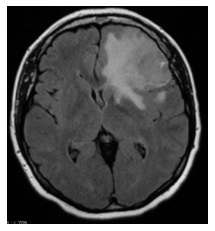

In [18]:
plot_cell(train_path, True,4)

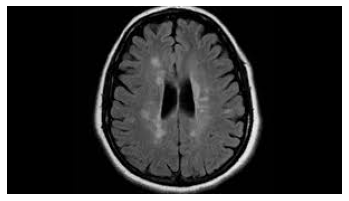

In [19]:
plot_cell(train_path, False,10)

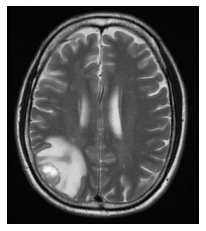

In [20]:
plot_cell(test_path, True,15)

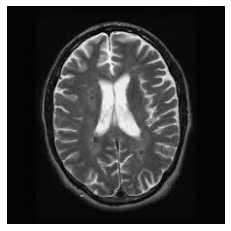

In [21]:
plot_cell(test_path, False,3)

In [22]:
def get_dim_for_all_images(my_data_dir,isTumour):
    """This function gets dimentions of all images in yes/no and train/test folder.
       Since images in the folder don't have unique shape, they all have different dimentions,
       This function will help us identify an average dim of all image so that we can fix the input size for our model 
       and resize all the image to the average dimentions of the images
    my_data_dir: path to cell_images folder
    
    isTumour: Boolean, True, if want to get dim for infected cell and 
                          False if want to get dim for uninfected images
    
    Returns: list of Heights, Widths and Channels for each image present in the folder"""
    
    
    # YOUR CODE HERE
    if isTumour:
      path=pjoin(my_data_dir,'yes')      
      image_list=[(cv2.imread(path+'/'+(get_image_list(my_data_dir,True)[x]))).shape for x in range(len(get_image_list(my_data_dir,True)))]
      height_list=[x[0] for x in image_list]
      weight_list=[x[1] for x in image_list]
      channel_list=[x[2] for x in image_list] 
      
    else:
      path=pjoin(my_data_dir,'no')      
      image_list=[(cv2.imread(path+'/'+(get_image_list(my_data_dir,False)[x]))).shape for x in range(len(get_image_list(my_data_dir,False)))]
      height_list=[x[0] for x in image_list]
      weight_list=[x[1] for x in image_list]
      channel_list=[x[2] for x in image_list]
      
    return height_list, weight_list, channel_list
    raise NotImplementedError()

In [23]:

dim1, dim2, colors = get_dim_for_all_images(train_path, False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


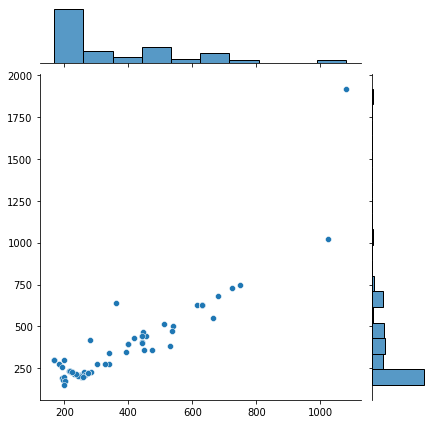

In [24]:

sns.jointplot(dim1, dim2)

In [25]:
true_dim1, true_dim2, true_colors = get_dim_for_all_images(train_path, True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


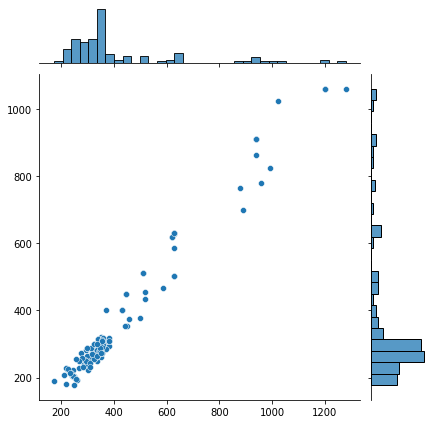

In [26]:
sns.jointplot(true_dim1, true_dim2)

In [27]:
print("Mean Height of image is {0}\nMean Width of image is {1} of Tumour Samples are".format(np.mean(true_dim1), np.mean(true_dim2)))

Mean Height of image is 406.8705035971223
Mean Width of image is 354.9496402877698 of Tumour Samples are


In [28]:
print("Mean Height of image is {0}\nMean Width of image is {1} of Non-Tumour Samples are".format(np.mean(dim1), np.mean(dim2)))

Mean Height of image is 354.21590909090907
Mean Width of image is 357.89772727272725 of Non-Tumour Samples are


In [29]:
image_shape = (350,350,3)

**Data Augumentation**

Removing Noise from Images

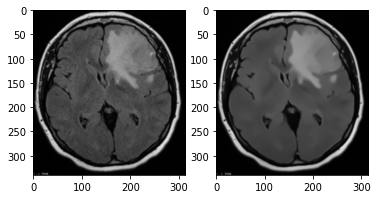

In [30]:
img = cv2.imread(train_path+'/yes/Y195.JPG')
dst = cv2.fastNlMeansDenoising(img,None,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()


In [31]:
def remove_noise(img): 
    
  # Convert back to uint8
  noisy_img = np.uint8(np.clip(img,0,255))       
  dst = cv2.fastNlMeansDenoising(noisy_img,None,10,7,21)
  return dst

Custom Preprocessing function removes noise from the images and then ResNet50 inbuilt pre processing function is applied.

In [32]:
def custom_preprocessing_fn(img):
  img_rm_noise=remove_noise(img)
  resnet_preprocess=preprocess_input(img_rm_noise)
  return resnet_preprocess

In [33]:
def image_generator(validation_split,preprocessing_function):
    
    datagen=ImageDataGenerator(preprocessing_function=preprocessing_function,validation_split=validation_split)    
    return datagen
    raise NotImplementedError()

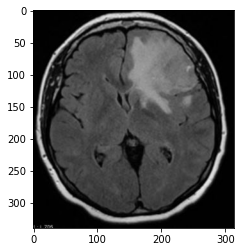

In [34]:
img = imread(pjoin(train_path, 'yes/', get_image_list(train_path, True)[4]))
plt.imshow(image_generator(0.10,custom_preprocessing_fn).random_transform(img))
plt.show()

In [35]:
batch_size = 16

In [36]:
image_gen = image_generator(0.10,custom_preprocessing_fn)


test_image_gen = image_generator(0.0,None)

In [37]:
def flow_from_dir(generator, split, target_size, batch_size, class_mode, subset, shuffle, seed,my_data_dir = dataset_path):
   
    # YOUR CODE HERE
    
    gen=generator.flow_from_directory(pjoin(my_data_dir,split),seed=seed,target_size=target_size,batch_size=batch_size, class_mode=class_mode, subset=subset,shuffle=shuffle)
    return gen
    raise NotImplementedError()

In [38]:
train_image_gen = flow_from_dir(image_gen, 'train', image_shape[:2], batch_size, 'binary', 'training', True,seed_value)
val_image_gen = flow_from_dir(image_gen, 'train', image_shape[:2], batch_size, 'binary', 'validation', True,seed_value)
test_image_gen = flow_from_dir(test_image_gen, 'test', image_shape[:2], batch_size, 'binary', None, False,seed_value)

Found 206 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


**Image Classification using Transfer Learning**<br>
Download ResNet50 pre-trained model.

In [35]:

base_model = tf.keras.applications.ResNet50(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [36]:
base_model.trainable = False

In [37]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 350, 350, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 356, 356, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 175, 175, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 175, 175, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [38]:


x = base_model.output
x = Conv2D(32, (3, 3), input_shape=image_shape, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dense(564,activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x=  Flatten(name="flatten") (x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5,seed=seed_value)(x)
x = Dense(1,activation='sigmoid')(x)



In [39]:

model = Model(inputs=base_model.input, outputs=x)

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 350, 350, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 356, 356, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 175, 175, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 175, 175, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [41]:
learning_rate = 1e-3
initial_epochs = 20

In [42]:
# compile the model
opt = SGD(lr=learning_rate)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [43]:
 from tensorflow.keras.callbacks import ModelCheckpoint

In [44]:
pip install h5py

**Model Checkpoint**<br> The best model gets saved when the validation loss decreases while running epochs. This model is then utilized in the Flask application for prediction on an image.

In [45]:
filepath="/content/drive/MyDrive/Hive_NeuroScience/SGD_model_denseadddf_save_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',save_weights_only=False)
callbacks_list = [checkpoint]

In [46]:
# train the model
print("[INFO] training model...")
history= model.fit(train_image_gen,validation_data=val_image_gen,	epochs=initial_epochs,callbacks=callbacks_list, verbose=1)

[INFO] training model...
Epoch 1/20
13/13 [==============================] - 104s 7s/step - loss: 0.7798 - accuracy: 0.5942 - val_loss: 0.5914 - val_accuracy: 0.7619

Epoch 00001: val_loss improved from inf to 0.59144, saving model to /content/drive/MyDrive/Hive_NeuroScience/SGD_model_denseadddf_save_model.h5
Epoch 2/20
13/13 [==============================] - 92s 7s/step - loss: 0.6572 - accuracy: 0.6178 - val_loss: 0.5433 - val_accuracy: 0.8095

Epoch 00002: val_loss improved from 0.59144 to 0.54334, saving model to /content/drive/MyDrive/Hive_NeuroScience/SGD_model_denseadddf_save_model.h5
Epoch 3/20
13/13 [==============================] - 91s 7s/step - loss: 0.5231 - accuracy: 0.7112 - val_loss: 0.4847 - val_accuracy: 0.9048

Epoch 00003: val_loss improved from 0.54334 to 0.48467, saving model to /content/drive/MyDrive/Hive_NeuroScience/SGD_model_denseadddf_save_model.h5
Epoch 4/20
13/13 [==============================] - 91s 7s/step - loss: 0.5014 - accuracy: 0.8069 - val_loss: 0

In [48]:
model.save("/content/drive/MyDrive/Hive_NeuroScience/my_model/")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Hive_NeuroScience/my_model/assets


Load the model for using in Flask application for prediction

In [39]:
reconstructed_model = tf.keras.models.load_model("/content/drive/MyDrive/Hive_NeuroScience/my_model/")


Evaluating the model on the test set.

In [50]:
loss, accuracy = reconstructed_model.evaluate(test_image_gen)
print('Test accuracy :', accuracy)

2/2 [==============================] - 6s 5s/step - loss: 0.2294 - accuracy: 0.9615
Test accuracy : 0.9615384340286255


**Model Visualization**

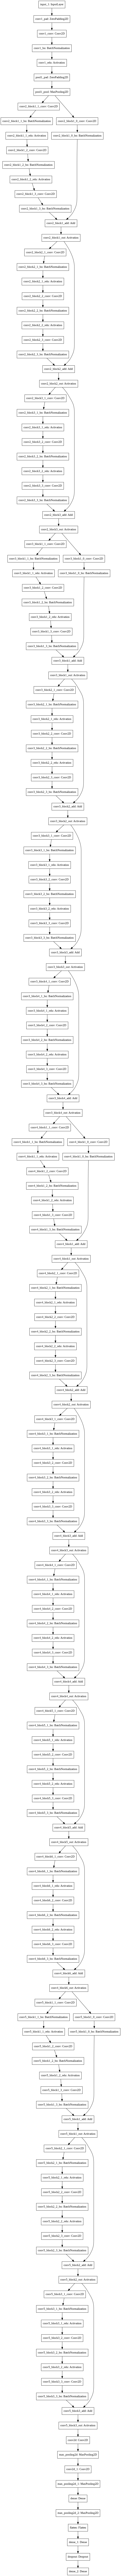

In [51]:
tf.keras.utils.plot_model(
    reconstructed_model ,
    to_file="/content/drive/MyDrive/Hive_NeuroScience/model_visualization.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [44]:
pred_probabilities=reconstructed_model.predict(test_image_gen)

In [45]:
def prob_to_pred(pred_probabilities, threshold):
    """This function converts the prediction probability to classwise prediction
    pred_probabilities: probability of prediction
    threshold: partitioning value that classifies probability to prediction. 
               Usually we take it as 0.5, but it can change depending upon problem statement
    
    Returns: 1D Vector.False corresponds to 0 which in turn corresponds to absence of brain tumour and vice versa"""
    
    # YOUR CODE HERE
    pred_bool = pred_probabilities >= 0.5
    return pred_bool
    raise NotImplementedError()

In [46]:
predictions = prob_to_pred(pred_probabilities, 0.5)

**Performance Metrics**

In [47]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26



In [48]:
cm=confusion_matrix(test_image_gen.classes,predictions)
print(cm)

[[10  0]
 [ 1 15]]


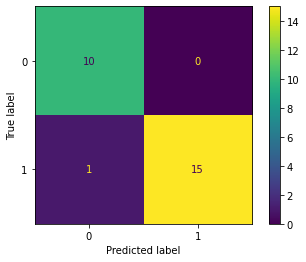

In [53]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=(0,1)).plot()

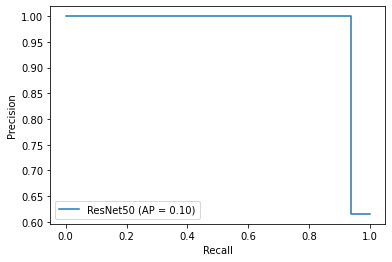

In [62]:
prec, recall, _ = precision_recall_curve(test_image_gen.classes,predictions,pos_label=1)
                                         
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall,average_precision=0.1,estimator_name="ResNet50").plot()

**Predicting on a Single Image**

In [57]:
# Predict on a single image
image = load_img('/content/drive/MyDrive/Hive_NeuroScience/brain_tumour_images/test/yes/Y49.JPG', target_size=(350, 350))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
predict_image=model.predict(image)
print(predict_image)

[[0.73276436]]


In [58]:
image_predictions=prob_to_pred(predict_image, 0.5)
print(image_predictions.item())

True
